In [1]:
import pandas as pd 
import numpy as np
import os
import sys

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
root_dir = "/nfs/turbo/umms-indikar/temp-sam/added-LTS/Pore-C-Snakemake/results_fsu_cmb/align_table/"
ext = ".pore_c.parquet"

kits = {
    10 : 'cytivia sc',
    11 : 'cytivia sc',
    12 : 'NEB20U',
    1 : 'NEB20U',
    3 : 'NEB5U',
}

df_list = []

for i, f in enumerate(os.listdir(root_dir)):
    if f.endswith(ext):
        split_name = f.split("_")
        cell_id = int(split_name[1][-2:])
        file_id = split_name[1] + "_" + split_name[2]
        
        if cell_id in kits.keys():
            
            file_path = f"{root_dir}{f}"
            tmp = pd.read_parquet(file_path)
            tmp['barcode'] = f"barcode{cell_id}"
            tmp['mda_kit'] = kits[cell_id]
            tmp['file_id'] = file_id
            
            df_list.append(tmp)
            
            print(f, tmp.shape)
                  
df = pd.concat(df_list, ignore_index=True)
print(df.shape)
df.head()    


NlaIII_run10_batch5_GRCm39_unphased.at.pore_c.parquet (27385, 31)
NlaIII_run01_batch5_GRCm39_unphased.at.pore_c.parquet (305347, 31)
NlaIII_run03_batch1_GRCm39_unphased.at.pore_c.parquet (377615, 31)
NlaIII_run11_batch1_GRCm39_unphased.at.pore_c.parquet (359752, 31)
NlaIII_run01_batch1_GRCm39_unphased.at.pore_c.parquet (286657, 31)
NlaIII_run01_batch2_GRCm39_unphased.at.pore_c.parquet (339457, 31)
NlaIII_run11_batch4_GRCm39_unphased.at.pore_c.parquet (364803, 31)
NlaIII_run11_batch3_GRCm39_unphased.at.pore_c.parquet (373445, 31)
NlaIII_run11_batch2_GRCm39_unphased.at.pore_c.parquet (368782, 31)
NlaIII_run03_batch3_GRCm39_unphased.at.pore_c.parquet (418841, 31)
NlaIII_run03_batch2_GRCm39_unphased.at.pore_c.parquet (460052, 31)
NlaIII_run10_batch2_GRCm39_unphased.at.pore_c.parquet (342096, 31)
NlaIII_run03_batch4_GRCm39_unphased.at.pore_c.parquet (422437, 31)
NlaIII_run10_batch3_GRCm39_unphased.at.pore_c.parquet (336200, 31)
NlaIII_run12_batch2_GRCm39_unphased.at.pore_c.parquet (349549, 

,read_idx,align_idx,align_type,chrom,start,end,strand,read_name,read_length,read_start,...,num_overlapping_fragments,overlap_length,fragment_start,fragment_end,perc_of_alignment,perc_of_fragment,is_contained,barcode,mda_kit,file_id
0,0,0,primary,NC_000079.7,102041508,102041816,False,4a3dec88-a55f-4036-9f69-4433b00729ac,928,274,...,1,308,102041142,102041835,100.000000,44.444443,False,barcode10,cytivia sc,run10_batch5
1,0,1,primary,NC_000079.7,102043307,102043503,False,4a3dec88-a55f-4036-9f69-4433b00729ac,928,605,...,2,159,102043282,102043466,81.122452,86.413040,False,barcode10,cytivia sc,run10_batch5
2,1,2,primary,NC_000086.8,6698608,6699054,False,c4fb8958-3b7c-49cd-88a4-699583faf65a,6236,4964,...,3,230,6698296,6698838,51.569508,42.435425,False,barcode10,cytivia sc,run10_batch5
3,1,3,primary,NC_000072.7,50869793,50870606,True,c4fb8958-3b7c-49cd-88a4-699583faf65a,6236,4961,...,5,284,50869869,50870153,34.932350,100.000000,True,barcode10,cytivia sc,run10_batch5
4,1,4,primary,NC_000072.7,50346833,50347242,True,c4fb8958-3b7c-49cd-88a4-699583faf65a,6236,4271,...,3,378,50346862,50347240,92.420540,100.000000,True,barcode10,cytivia sc,run10_batch5


In [3]:
df.columns

Index(['read_idx', 'align_idx', 'align_type', 'chrom', 'start', 'end',
       'strand', 'read_name', 'read_length', 'read_start', 'read_end',
       'mapping_quality', 'align_score', 'align_base_qscore', 'phase_set',
       'phase_qual', 'haplotype', 'pass_filter', 'filter_reason',
       'fragment_id', 'num_contained_fragments', 'num_overlapping_fragments',
       'overlap_length', 'fragment_start', 'fragment_end', 'perc_of_alignment',
       'perc_of_fragment', 'is_contained', 'barcode', 'mda_kit', 'file_id'],
      dtype='object')

In [4]:
print(len(df['read_name']))
print(df['read_name'].nunique())

7257631
997542


In [5]:
tmp = df[['read_name', 'file_id']].drop_duplicates()
print(len(tmp))

997542


In [6]:
df['fragment_length'] = df['fragment_end'] - df['fragment_start']

In [7]:
res = df.groupby(['barcode', 'mda_kit'], as_index=False).agg(
    total_reads = ('read_name', 'nunique'),
    total_fragments = ('fragment_id', 'count'),
    unique_fragments = ('fragment_id', 'nunique'),
)
    
res['percent_fragments_unique'] = res['unique_fragments'] / res['total_fragments']
res

,barcode,mda_kit,total_reads,total_fragments,unique_fragments,percent_fragments_unique
0,barcode1,NEB20U,244212,1647178,23806,0.014453
1,barcode10,cytivia sc,203969,1359277,211725,0.155763
2,barcode11,cytivia sc,248140,1821083,243462,0.133691
3,barcode12,NEB20U,97071,712246,24690,0.034665
4,barcode3,NEB5U,204150,1717847,27107,0.015780


In [28]:
"read_length: The length of the read in bases"

res = df.groupby(['barcode', 'mda_kit'], as_index=False).agg(
    mean_read_length = ('read_length', np.mean),
    median_read_length = ('read_length', 'median'),
    mean_fragment_length = ('fragment_length', np.mean),
    median_fragment_length = ('fragment_length', 'median'),
)
    
res.head()

,barcode,mda_kit,mean_read_length,median_read_length,mean_fragment_length,median_fragment_length
0,barcode1,NEB20U,8063.827457,6098.0,429.358916,384.0
1,barcode10,cytivia sc,4255.435921,3427.0,584.269274,415.0
2,barcode11,cytivia sc,4404.662802,3481.0,527.191021,399.0
3,barcode12,NEB20U,8149.278915,6175.0,447.469591,397.0
4,barcode3,NEB5U,9955.422273,7320.0,436.361146,387.0


In [35]:
tmp = df[df['barcode'] == 'barcode1']

tmp = tmp[tmp['read_name'] == '70060351-d371-4e69-923d-caa5ad79d4d3']
tmp = tmp.sort_values(by='fragment_id')

tmp[['read_name', 'fragment_id', 'perc_of_alignment', 'overlap_length']].head(30)

,read_name,fragment_id,perc_of_alignment,overlap_length
27404,70060351-d371-4e69-923d-caa5ad79d4d3,753437,86.516853,77
27397,70060351-d371-4e69-923d-caa5ad79d4d3,1298511,99.256508,534
27386,70060351-d371-4e69-923d-caa5ad79d4d3,1298511,99.256508,534
27387,70060351-d371-4e69-923d-caa5ad79d4d3,1298511,99.256508,534
27388,70060351-d371-4e69-923d-caa5ad79d4d3,1298511,99.813087,534
27398,70060351-d371-4e69-923d-caa5ad79d4d3,1298511,100.000000,525
27407,70060351-d371-4e69-923d-caa5ad79d4d3,2031127,88.888885,48
27406,70060351-d371-4e69-923d-caa5ad79d4d3,2879853,88.888885,48
27409,70060351-d371-4e69-923d-caa5ad79d4d3,4111514,88.888885,48
27394,70060351-d371-4e69-923d-caa5ad79d4d3,6352897,100.000000,526


Text(0.5, 0, 'Read Length (log base-pair)')

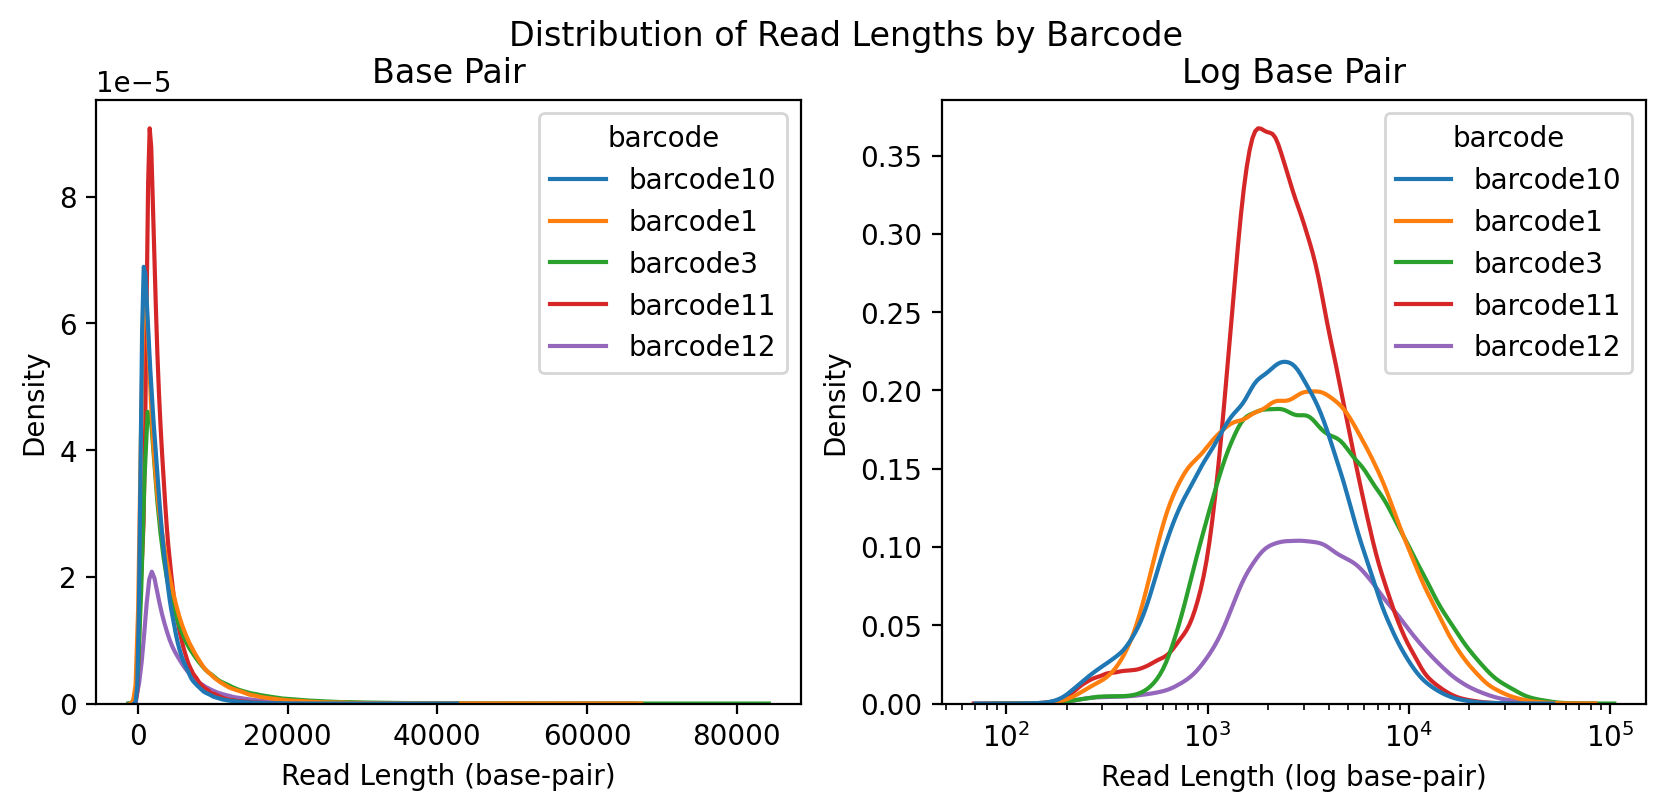

In [9]:
tmp = df[['read_name', 'read_length', 'barcode']].drop_duplicates()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 4
fig, (ax1, ax2) = plt.subplots(1, 2)

plt.suptitle("Distribution of Read Lengths by Barcode")

sns.kdeplot(data=tmp,
            hue='barcode',
            x='read_length',
            log_scale=False,
            alpha=0.5,
            ax=ax1)

ax1.set_title("Base Pair")
ax1.set_xlabel("Read Length (base-pair)")

sns.kdeplot(data=tmp,
            hue='barcode',
            x='read_length',
            log_scale=True,
            ax=ax2)

ax2.set_title("Log Base Pair")
ax2.set_xlabel("Read Length (log base-pair)")

In [17]:
"num_contained_fragments: The number of restriction fragments completely contained within this alignment"
"overlap_length: The length of the overlap between alignment and fragment"

tmp = df[['read_name', 'read_length', 'barcode', '']].drop_duplicates()

res = df.groupby(['barcode', 'mda_kit'], as_index=False).agg(
    mean_fragments_contained_per_fragment = ('num_contained_fragments', np.mean),
    mean_fragment_length = ('fragment_length', np.mean),
    mean_overlap_length = ('overlap_length', np.mean),
)
    
res.head()

,barcode,mda_kit,mean_fragments_contained_per_fragment,mean_fragment_length,mean_overlap_length
0,barcode1,NEB20U,2.094459,429.358916,361.659026
1,barcode10,cytivia sc,0.872271,584.269274,260.280412
2,barcode11,cytivia sc,0.886526,527.191021,269.578530
3,barcode12,NEB20U,2.322025,447.469591,381.287543
4,barcode3,NEB5U,2.038357,436.361146,370.144939


In [11]:
"The alignment score as calculated by the aligner"

res = df.groupby(['barcode', 'mda_kit'], as_index=False).agg(
    mean_alignment_score = ('align_score', np.mean),
    median_alignment_score = ('align_score', 'median'),
    mean_MAPQ = ('mapping_quality', np.mean),
    median_MAPQ = ('mapping_quality', 'median'),
)
    
res.head()

,barcode,mda_kit,mean_alignment_score,median_alignment_score,mean_MAPQ,median_MAPQ
0,barcode1,NEB20U,398.413717,320.0,150.233961,204.0
1,barcode10,cytivia sc,236.968666,171.0,70.637757,36.0
2,barcode11,cytivia sc,241.689878,179.0,73.012679,37.0
3,barcode12,NEB20U,431.414391,337.0,147.973014,199.0
4,barcode3,NEB5U,396.801770,319.0,143.839244,198.0


Text(0.5, 0, 'Percent Aligment (Sequence)')

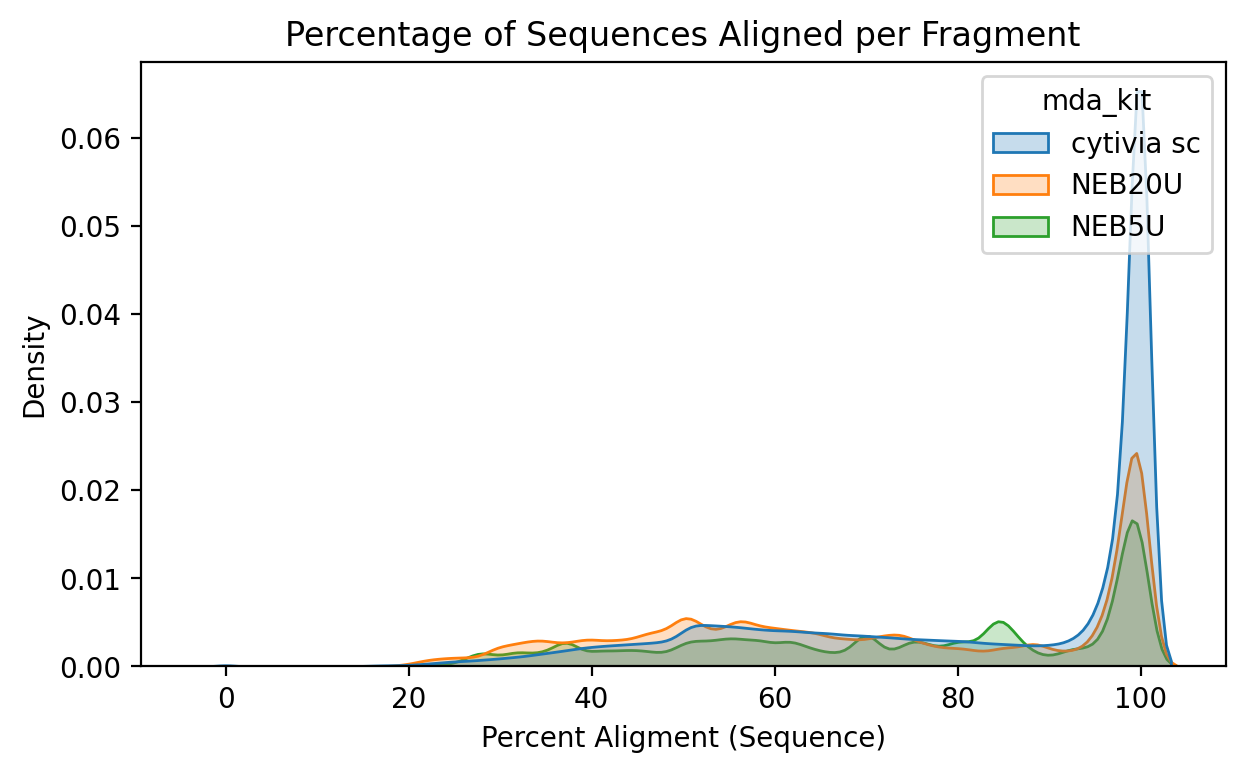

In [13]:
"The percentage of the aligned segment that overlaps the assigned fragment"

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4
sns.kdeplot(data=df,
            x='perc_of_alignment',
            hue='mda_kit',
            fill=True)

plt.title("Percentage of Sequences Aligned per Fragment")
plt.ylabel("Density")
plt.xlabel("Percent Aligment (Sequence)")

Text(0.5, 0, 'Percent Aligment (Fragment)')

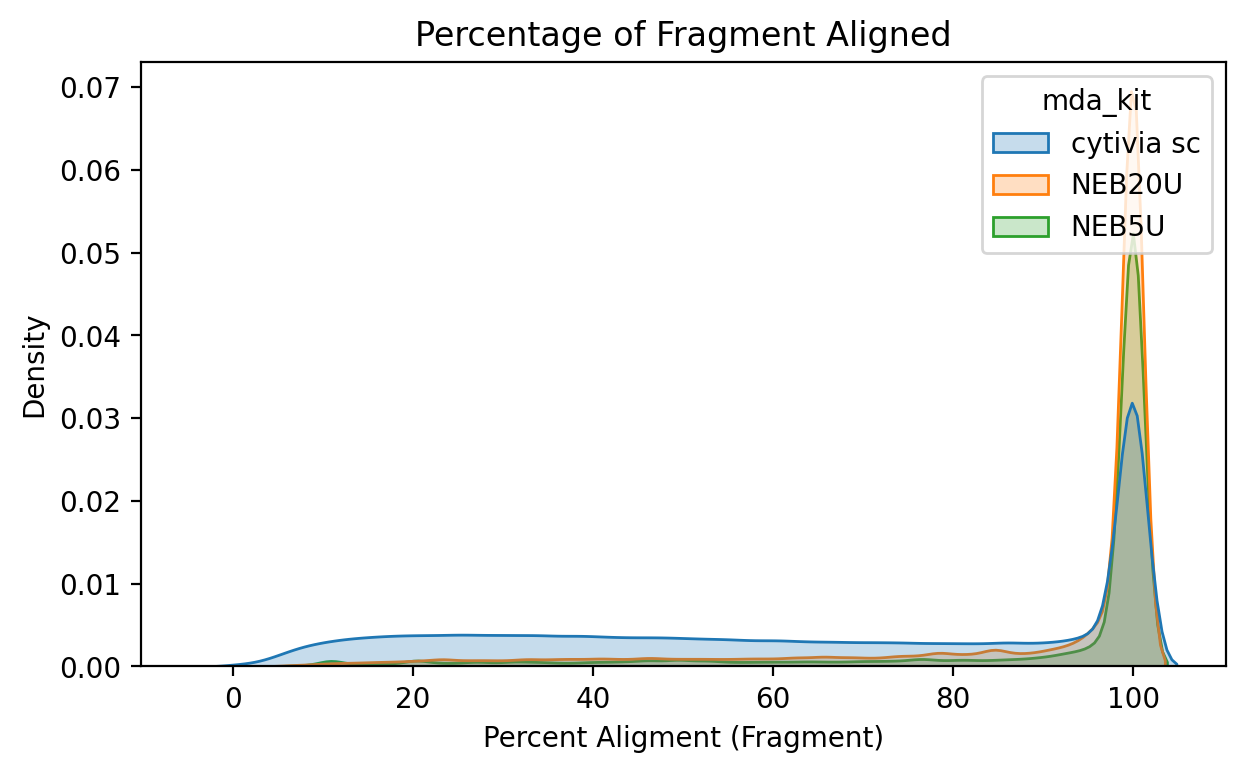

In [14]:
"The percentage of the assigned restriction fragment that overlaps the aligned segment"

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 7, 4                         
sns.kdeplot(data=df,
            x='perc_of_fragment',
            hue='mda_kit',
            fill=True)

plt.title("Percentage of Fragment Aligned")
plt.ylabel("Density")
plt.xlabel("Percent Aligment (Fragment)")